In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the Data
df=pd.read_csv(r"C:\Users\there\Desktop\DataAnalysis_Course\DataForDataAnalysis\fcc-forum-pageviews.csv")

In [3]:
df["date"] = pd.to_datetime(df["date"])

In [4]:
df["date"]

0      2016-05-09
1      2016-05-10
2      2016-05-11
3      2016-05-12
4      2016-05-13
          ...    
1299   2019-11-29
1300   2019-11-30
1301   2019-12-01
1302   2019-12-02
1303   2019-12-03
Name: date, Length: 1304, dtype: datetime64[ns]

In [5]:
# Sort the DF from oldest to most recent recordings
df.sort_values(by="date", inplace=True)

In [6]:
# Set the index to the "date" column.
df.set_index(["date"], inplace=True)

In [7]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [8]:
df.tail()

,value
date,
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918
2019-12-02,220144
2019-12-03,158549


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [10]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [11]:
df.shape

(1304, 1)

In [12]:
df.isnull().sum()

value    0
dtype: int64

In [13]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset

In [14]:
df_filtered = df[
    (df["value"] > df["value"].quantile(0.025)) &
    (df["value"] < df["value"].quantile(0.975))
]

In [15]:
df_filtered

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


##### Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

In [16]:
df_filtered.index = pd.to_datetime(df_filtered.index)

In [17]:
pageview_data_new=df_filtered.reset_index()

In [18]:
pageview_data_new

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325
...,...,...
1233,2019-11-24,138875
1234,2019-11-29,171584
1235,2019-11-30,141161
1236,2019-12-01,142918


In [19]:
pageview_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1238 non-null   datetime64[ns]
 1   value   1238 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.5 KB


In [20]:
pageview_data_new['day'] = pageview_data_new['date'].dt.day
pageview_data_new['month'] = pageview_data_new['date'].dt.month
pageview_data_new['year'] = pageview_data_new['date'].dt.year

In [21]:
pageview_data_new

,date,value,day,month,year
0,2016-05-19,19736,19,5,2016
1,2016-05-26,18060,26,5,2016
2,2016-05-27,19997,27,5,2016
3,2016-05-28,19044,28,5,2016
4,2016-05-29,20325,29,5,2016
...,...,...,...,...,...
1233,2019-11-24,138875,24,11,2019
1234,2019-11-29,171584,29,11,2019
1235,2019-11-30,141161,30,11,2019
1236,2019-12-01,142918,1,12,2019


In [22]:
import calendar
pageview_data_new['month'] = pageview_data_new['month'].apply(lambda x: calendar.month_abbr[x])

In [23]:
pageview_data_new

,date,value,day,month,year
0,2016-05-19,19736,19,May,2016
1,2016-05-26,18060,26,May,2016
2,2016-05-27,19997,27,May,2016
3,2016-05-28,19044,28,May,2016
4,2016-05-29,20325,29,May,2016
...,...,...,...,...,...
1233,2019-11-24,138875,24,Nov,2019
1234,2019-11-29,171584,29,Nov,2019
1235,2019-11-30,141161,30,Nov,2019
1236,2019-12-01,142918,1,Dec,2019


In [24]:
pageview_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1238 non-null   datetime64[ns]
 1   value   1238 non-null   int64         
 2   day     1238 non-null   int64         
 3   month   1238 non-null   object        
 4   year    1238 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 48.5+ KB


In [25]:
pageview_data_new['value']

0        19736
1        18060
2        19997
3        19044
4        20325
         ...  
1233    138875
1234    171584
1235    141161
1236    142918
1237    158549
Name: value, Length: 1238, dtype: int64

In [26]:
x=pageview_data_new['date']
y=pageview_data_new['value']

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

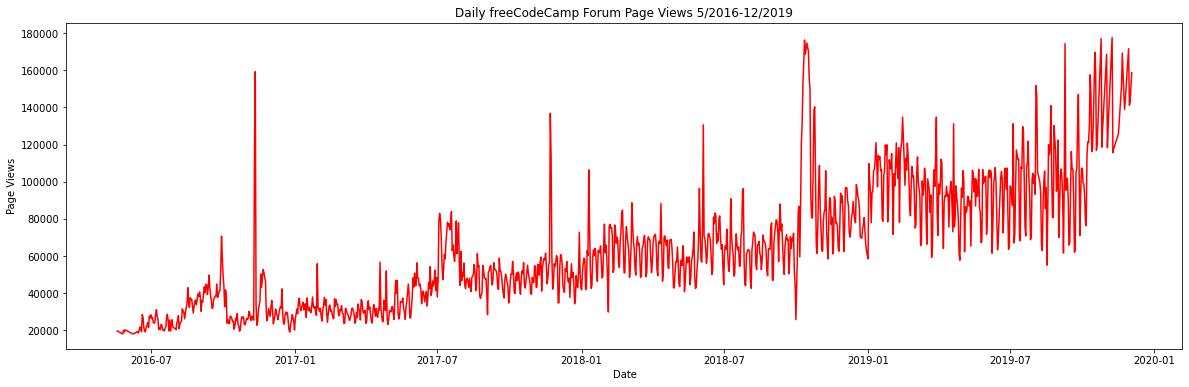

In [27]:
plt.figure(figsize=(20,6))
plt.plot(x,y, color='red')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

### Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [28]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
# Create a column that has the year of each date recording
df["year"] = df.index.year
# Create a column that has the month (1-12) of each date recording
df["month"] = df.index.month

In [29]:
df["month"]

date
2016-05-09     5
2016-05-10     5
2016-05-11     5
2016-05-12     5
2016-05-13     5
              ..
2019-11-29    11
2019-11-30    11
2019-12-01    12
2019-12-02    12
2019-12-03    12
Name: month, Length: 1304, dtype: int64

In [30]:
# Map the month integers to their proper names
df["month"] = df["month"].apply(
    lambda data: months[data-1])

In [31]:
# Make this a categorical column so it can be sorted by the order of values\
# in the `months` list, i.e., the proper month order
df["month"] = pd.Categorical(df["month"], categories=months)

In [32]:
df["month"] 

date
2016-05-09         May
2016-05-10         May
2016-05-11         May
2016-05-12         May
2016-05-13         May
                ...   
2019-11-29    November
2019-11-30    November
2019-12-01    December
2019-12-02    December
2019-12-03    December
Name: month, Length: 1304, dtype: category
Categories (12, object): ['January', 'February', 'March', 'April', ..., 'September', 'October', 'November', 'December']

In [33]:
# Pivot the DF so that there's a column for each month, each row represents a year, and the cells have the mean page views for the respective year and month
df_pivot = pd.pivot_table(
	df,
	values="value",
	index="year",
	columns="month",
	aggfunc=np.mean
)

In [34]:
df_pivot.info

<bound method DataFrame.info of month        January       February         March         April           May  \
year                                                                            
2016             NaN            NaN           NaN           NaN  11242.695652   
2017    32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018    58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019   102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

month           June           July         August     September  \
year                                                               
2016    19124.366667   23314.225806   31049.193548  41476.866667   
2017    43577.500000   65806.838710   47712.451613  47376.800000   
2018    70117.000000   63591.064516   62831.612903  65941.733333   
2019   162402.600000  100804.451613  117991.032258  97268.833333   

month        October       November       December  
year               

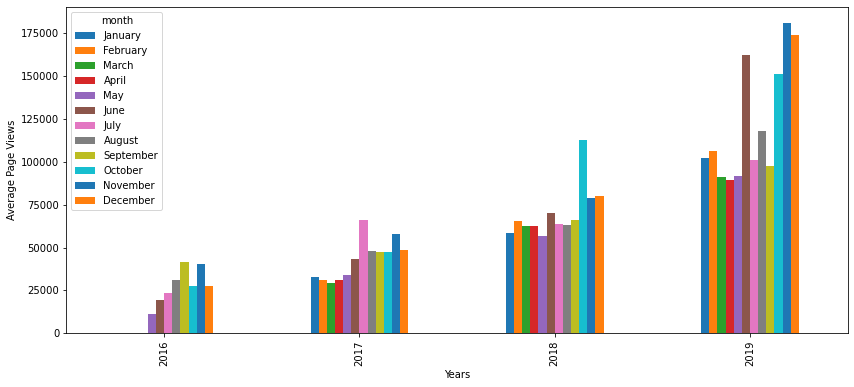

In [35]:
# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(14, 6)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

plt.show()

### Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png".
### These box plots should show how the values are distributed within a given year or month and how it compares over time.
#### The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)".
### Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [36]:
a = np.linspace(0, 2 * np.pi, 400)
b = np.sin(a ** 2)

Text(0.5, 1.0, 'Month-Wise Box Plot(Seasonality)')

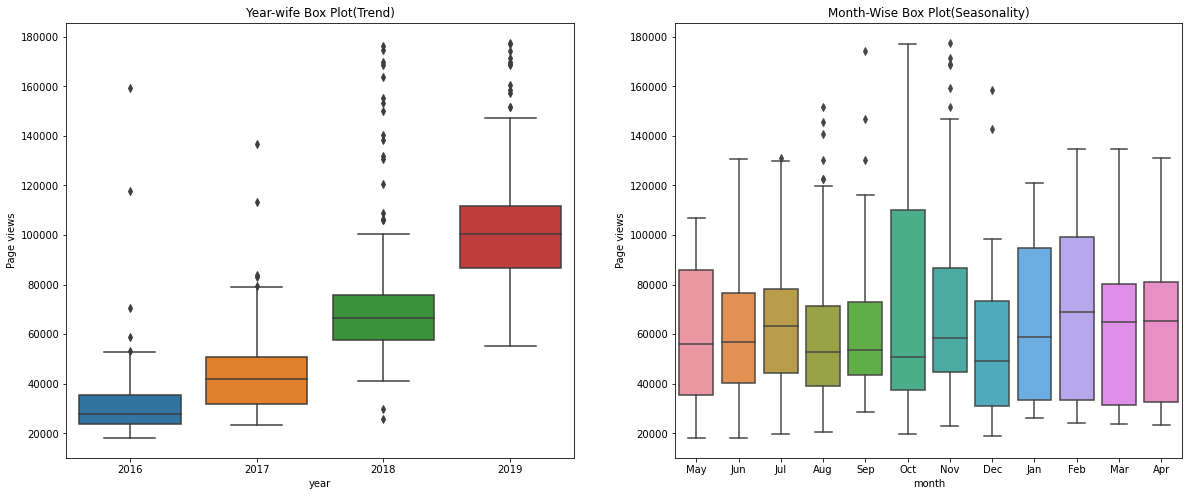

In [37]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
sns.boxplot(x='year',y='value',  data=pageview_data_new,ax=ax1)
plt.title('Tips by Day')
plt.xlabel('Day of Week')
plt.ylabel('Total Bill Amount ($)')
sns.boxplot(x='month',y='value',  data=pageview_data_new,ax=ax2)
ax1.set_ylabel('Page views')
ax1.set_title('Year-wife Box Plot(Trend)')
ax2.set_ylabel('Page views')
ax2.set_title('Month-Wise Box Plot(Seasonality)')